# 04 - Evaluación de Modelos

**Objetivo:** Comparar el rendimiento de Regresión Lineal y Random Forest para seleccionar el mejor modelo.

**Métricas:** R², RMSE, MAE, MAPE

In [22]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 1. Cargar Datos y Modelos

In [23]:
# Cargar datos de test
df_test = pd.read_csv('../01_preprocessing_results/preprocessing/T_test_final_objetivo.csv')

# Separar features y objetivo
X_test = df_test.drop(columns=['objetivo'])
y_test = df_test['objetivo']

print(f"Datos de test: {X_test.shape[0]} muestras, {X_test.shape[1]} features")
print(f"Variable objetivo - Min: {y_test.min():.2f}, Max: {y_test.max():.2f}, Media: {y_test.mean():.2f}")

Datos de test: 18250 muestras, 20 features
Variable objetivo - Min: -9.97, Max: 505.39, Media: 141.01


In [24]:
# Cargar modelos (guardados con joblib)
modelo_lineal = joblib.load('../02_lineal_regression_results/regression_lineal/modelo_reg_lineal.pkl')
modelo_rf = joblib.load('../03_random_forest_results/random_forest/modelo_random_forest.pkl')

print("Modelos cargados correctamente")

Modelos cargados correctamente


## 2. Generar Predicciones

In [25]:
# Predicciones
y_pred_lineal = modelo_lineal.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)

print(f"Predicciones Regresión Lineal - Min: {y_pred_lineal.min():.2f}, Max: {y_pred_lineal.max():.2f}")
print(f"Predicciones Random Forest - Min: {y_pred_rf.min():.2f}, Max: {y_pred_rf.max():.2f}")

Predicciones Regresión Lineal - Min: -22.13, Max: 411.95
Predicciones Random Forest - Min: 19.82, Max: 444.31


## 3. Calcular Métricas

In [26]:
def calcular_metricas(y_real, y_pred, nombre_modelo):
    """Calcula R², RMSE, MAE y MAPE"""
    r2 = r2_score(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    nrmse = rmse / (np.max(y_real) - np.min(y_real))
    mae = mean_absolute_error(y_real, y_pred)
    # MAPE - evitar división por cero
    mape = np.mean(np.abs((y_real - y_pred) / np.where(y_real == 0, 1, y_real))) * 100
    
    return {
        'Modelo': nombre_modelo,
        'R²': r2,
        'RMSE': rmse,
        'NRMSE': nrmse,
        'MAE': mae,
        'MAPE (%)': mape
    }

In [27]:
# Calcular métricas para ambos modelos
metricas_lineal = calcular_metricas(y_test, y_pred_lineal, 'Regresión Lineal')
metricas_rf = calcular_metricas(y_test, y_pred_rf, 'Random Forest')

# Crear tabla comparativa
df_metricas = pd.DataFrame([metricas_lineal, metricas_rf])
df_metricas = df_metricas.set_index('Modelo')
df_metricas = df_metricas.round(4)

print("\n" + "="*60)
print("TABLA COMPARATIVA DE MODELOS")
print("="*60)
print(df_metricas.to_string())
print("="*60)


TABLA COMPARATIVA DE MODELOS
                      R²     RMSE   NRMSE      MAE  MAPE (%)
Modelo                                                      
Regresión Lineal  0.7772  51.4784  0.0999  41.2284  256.8591
Random Forest     0.8134  47.1047  0.0914  37.3104  263.6088


## 4. Visualizaciones

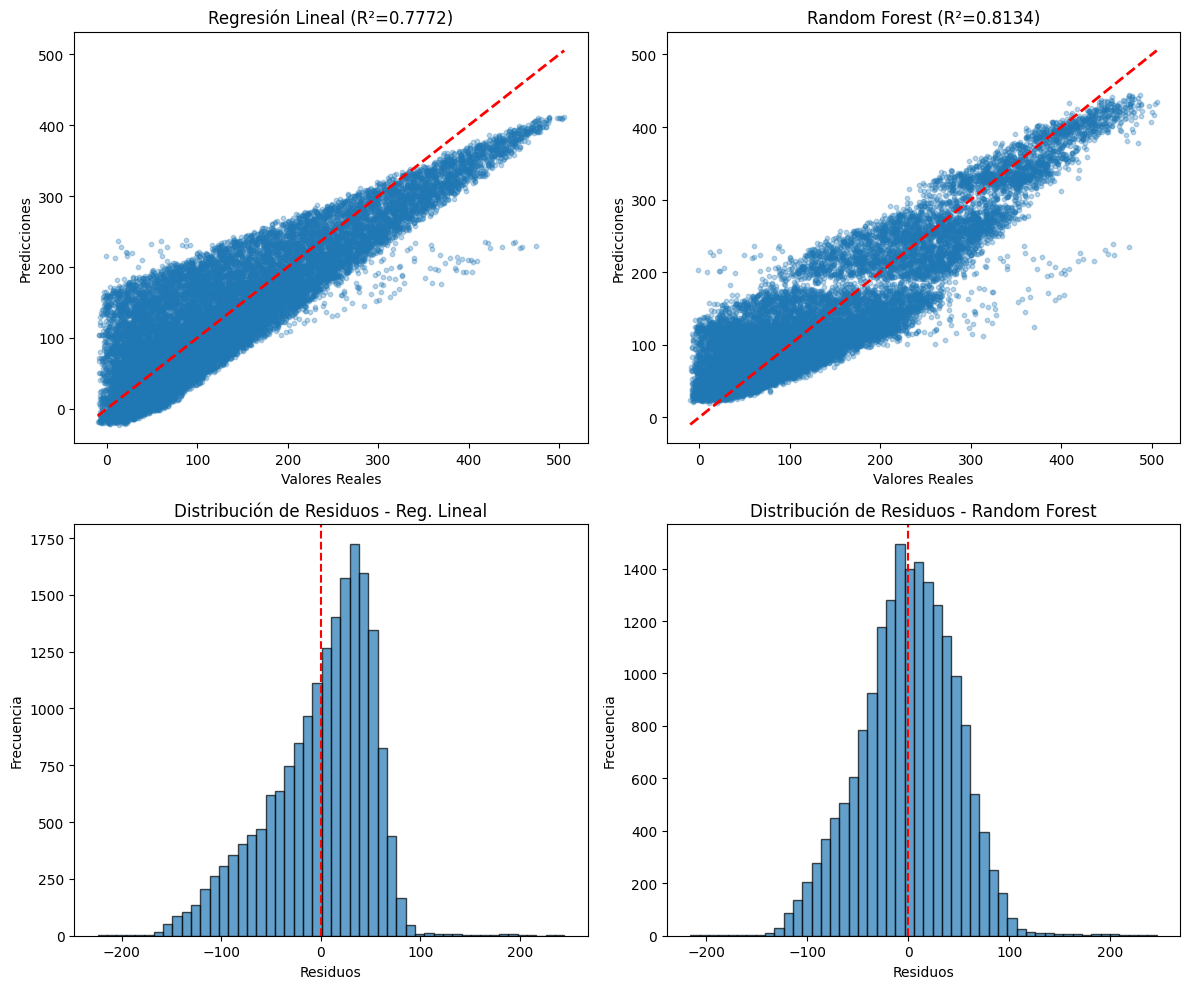

Gráfico guardado: comparacion_modelos.png


In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Predicciones vs Reales - Regresión Lineal
axes[0, 0].scatter(y_test, y_pred_lineal, alpha=0.3, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Valores Reales')
axes[0, 0].set_ylabel('Predicciones')
axes[0, 0].set_title(f'Regresión Lineal (R²={metricas_lineal["R²"]:.4f})')

# Predicciones vs Reales - Random Forest
axes[0, 1].scatter(y_test, y_pred_rf, alpha=0.3, s=10)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Valores Reales')
axes[0, 1].set_ylabel('Predicciones')
axes[0, 1].set_title(f'Random Forest (R²={metricas_rf["R²"]:.4f})')

# Residuos - Regresión Lineal
residuos_lineal = y_test - y_pred_lineal
axes[1, 0].hist(residuos_lineal, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Residuos - Reg. Lineal')

# Residuos - Random Forest
residuos_rf = y_test - y_pred_rf
axes[1, 1].hist(residuos_rf, bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Residuos')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Residuos - Random Forest')

plt.tight_layout()
plt.savefig('comparacion_modelos.png', dpi=150)
plt.show()

print("Gráfico guardado: comparacion_modelos.png")

## 5. Conclusión

In [29]:
# Determinar modelo ganador
mejor_r2 = 'Random Forest' if metricas_rf['R²'] > metricas_lineal['R²'] else 'Regresión Lineal'
mejor_rmse = 'Random Forest' if metricas_rf['RMSE'] < metricas_lineal['RMSE'] else 'Regresión Lineal'
mejor_mae = 'Random Forest' if metricas_rf['MAE'] < metricas_lineal['MAE'] else 'Regresión Lineal'

print("\n" + "="*60)
print("CONCLUSIÓN")
print("="*60)
print(f"\nMejor R²: {mejor_r2}")
print(f"Mejor RMSE: {mejor_rmse}")
print(f"Mejor MAE: {mejor_mae}")

# Modelo ganador (basado en R²)
ganador = mejor_r2
print(f"\n>>> MODELO GANADOR: {ganador} <<<")

if ganador == 'Random Forest':
    print(f"\nJustificación: Random Forest tiene mejor R² ({metricas_rf['R²']:.4f} vs {metricas_lineal['R²']:.4f})")
    print(f"y menor error (RMSE: {metricas_rf['RMSE']:.2f} vs {metricas_lineal['RMSE']:.2f})")
else:
    print(f"\nJustificación: Regresión Lineal tiene mejor R² ({metricas_lineal['R²']:.4f} vs {metricas_rf['R²']:.4f})")


CONCLUSIÓN

Mejor R²: Random Forest
Mejor RMSE: Random Forest
Mejor MAE: Random Forest

>>> MODELO GANADOR: Random Forest <<<

Justificación: Random Forest tiene mejor R² (0.8134 vs 0.7772)
y menor error (RMSE: 47.10 vs 51.48)


In [32]:
# Semáforo (sin CV), "aquí dentro"
# Para random forest
verde = (metricas_rf['R²'] >= 0.70) and (metricas_rf['NRMSE'] <= 0.50)
amarilo = (0.40 <= metricas_rf['R²'] < 0.70) or (0.50 < metricas_rf['NRMSE'] <= 0.80)
if verde:
    veredicto = "VERDE"
    significado = "confiable para predecir aquí dentro."
elif amarilo:
    veredicto = "AMARILLO"
    significado = "usable con cautela (depende del caso de uso)"
else:
    veredicto = "ROJO"
    significado = "no confiable para predicción aquí dentro"

print(f"El veredicto para el modelo Random Forest es: {veredicto}\n{significado}")

verde = (metricas_lineal['R²'] >= 0.70) and (metricas_lineal['NRMSE'] <= 0.50)
amarilo = (0.40 <= metricas_lineal['R²'] < 0.70) or (0.50 < metricas_lineal['NRMSE'] <= 0.80)
if verde:
    veredicto = "VERDE"
    significado = "confiable para predecir aquí dentro."
elif amarilo:
    veredicto = "AMARILLO"
    significado = "usable con cautela (depende del caso de uso)"
else:
    veredicto = "ROJO"
    significado = "no confiable para predicción aquí dentro"
print(f"El veredicto para el modelo Regresión Lineal es: {veredicto}\n{significado}")

El veredicto para el modelo Random Forest es: VERDE
confiable para predecir aquí dentro.
El veredicto para el modelo Regresión Lineal es: VERDE
confiable para predecir aquí dentro.


In [33]:
# Guardar resultados
df_metricas.to_csv('metricas_comparativas.csv')
print("Métricas guardadas en: metricas_comparativas.csv")

Métricas guardadas en: metricas_comparativas.csv
